# Visualisation Python, un ecosystème riche

Il existe un grand nombre de librairies python capable de faire de la visualisation de données. Vous connaissez déjà Matplotlib. Je vais ajouter à cela deux librairies : 

- seaborn, spécialisé dans les données statistiques
- pyviz, qui est un ensemble de librairies pour faire des visualisations interactives

## Matplotlib : la brique de base

On l'a déjà rencontré, c'est la brique de base de la visualisation en python. C'est une librairie très puissante et assez complexe. L'apprentissage se fait souvent avec des cookbook (apprentissage par l'exemple).

On va tout de même donner quelques notions sur le fonctionnement de la librairie.

### Appartée : interface "à la matlab", interface orientée objet

L'objectif, à la création de matplotlib, était de fournir un clone des fonctionalités de visualisation de Matlab sous python. Il est donc possible de créer et d'afficher des graphes avec des fonctions proches de Matlab. Il est toutefois conseillé d'utiliser l'interface propre à matplotlib qui utilise une approche orienté objet : cela permet de maitriser vraiment ce qu'on manipule.

Illustration des deux interfaces:

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Permet de visualiser les graphes sous jupyter sous forme d'images embarqués dans la sortie de la cellule.
%matplotlib inline 

Text(0, 0.5, '$x^2$')

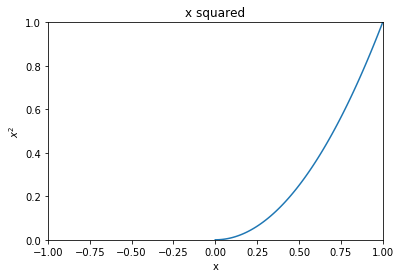

In [6]:
x = np.linspace(0, 1, 100)
plt.plot(x, x**2)
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.title("x squared")
plt.xlabel("x")
plt.ylabel("$x^2$") # on peut utiliser des formules latex si on le souhaite

L'interface à la matlab ne fait aucun cas de quel objet est vraiment manipulé : on utilise les fonctions et on fait confiance pour que l'objet manipulé soit le bon.

Il est aussi possible d'utiliser l'interface orienté objet :

Text(0, 0.5, '$x^2$')

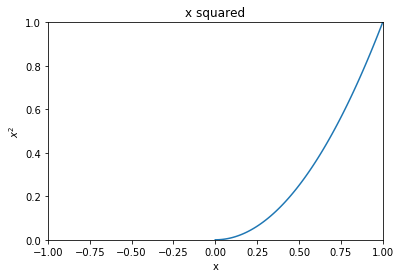

In [7]:
x = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
# fig représente la figure entière, ax le graphique (axes, courbes...). Il peut y avoir plusieurs graphiques sur une figure.
ax.plot(x, x**2) # c'est bien le graphique qui a la méthode `plot`
ax.set_xlim(-1, 1) # on va avoir deux méthodes : set_xlim et get_xlim. plt.xlim fera l'un ou l'autre selon le nombre d'arguments fournis.
ax.set_ylim(0, 1)
ax.set_title("x squared")
ax.set_xlabel("x")
ax.set_ylabel("$x^2$") # on peut utiliser des formules latex si on le souhaite

A la fin le résultat est le même, mais l'interface objet est **plus explicite**. C'est d'autant plus vrai lorsque l'on veut manipuler des subplots

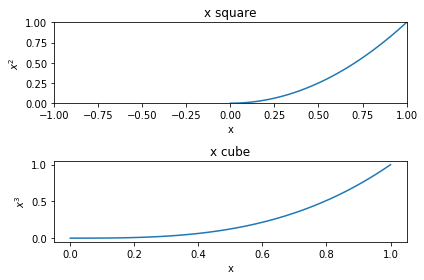

In [10]:
x = np.linspace(0, 1, 100)
plt.subplot(211) # on a 2 lignes, 1 colonnes, et on est en position 1
plt.plot(x, x**2)
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.title("x square")
plt.xlabel("x")
plt.ylabel("$x^2$")

plt.subplot(212) # on a 2 lignes, 1 colonnes, et on est en position 2
plt.plot(x, x**3)
plt.title("x cube")
plt.xlabel("x")
plt.ylabel("$x^3$")

plt.tight_layout()

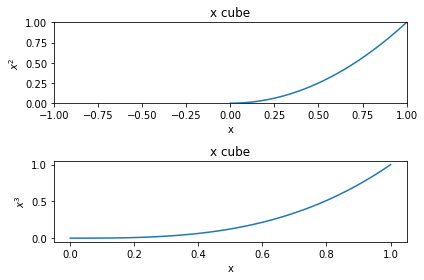

In [11]:
x = np.linspace(0, 1, 100)
fig, (ax0, ax1) = plt.subplots(2, 1) # on crée deux axs en séparant la figure en 2 lignes et une colonne.

ax0.plot(x, x**2)
ax0.set_xlim(-1, 1)
ax0.set_ylim(0, 1)
ax0.set_title("x cube")
ax0.set_xlabel("x")
ax0.set_ylabel("$x^2$")

ax1.plot(x, x**3)
ax1.set_title("x cube")
ax1.set_xlabel("x")
ax1.set_ylabel("$x^3$")

fig.tight_layout()

## Anatomie d'une figure

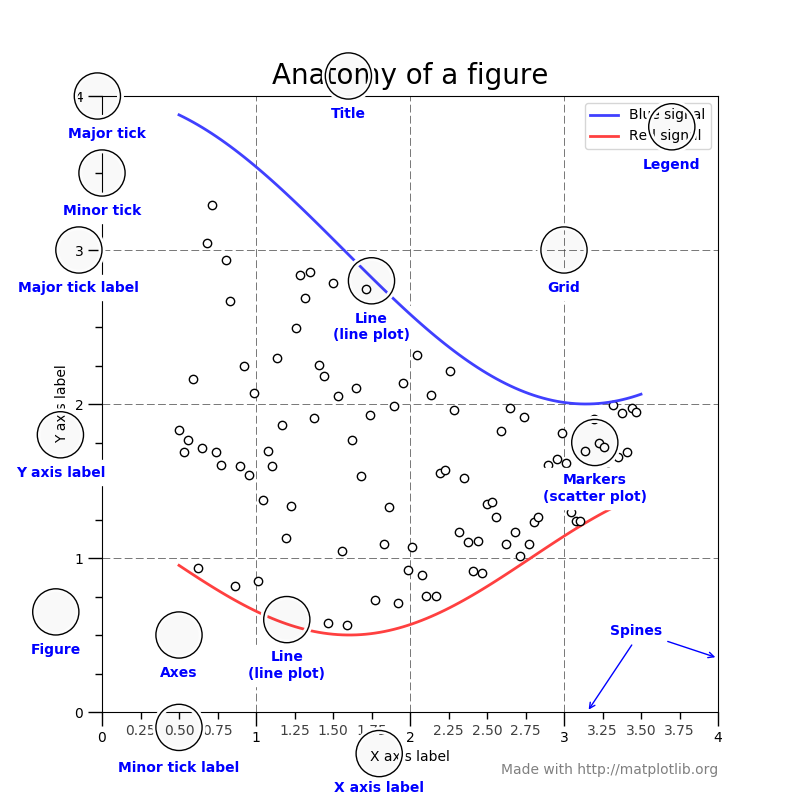

### Matplotlib Doc + Gallery

https://matplotlib.org/3.1.1/gallery/index.html

La documentation est assez riche, mais chaques fonctions majeure fait le lien entre un ou plusieurs exemples de la gallery. Celle ci contient toute une série de démonstration des possibilité de la librairie.

## Seaborn

Seaborn est une extension de matplotlib spécialisé dans les visualisation statistiques et les graphes combinés.

In [1]:
import seaborn as sns

In [5]:
df = sns.load_dataset("iris") # seaborn peut télécharger des sets de données bien utiles pour faire des tests

### Distribution

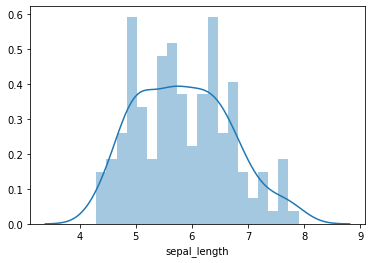

In [8]:
sns.distplot(df.sepal_length, bins=20)

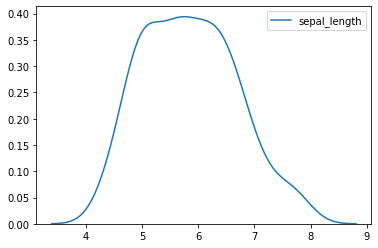

In [16]:
sns.kdeplot(df.sepal_length)

### Graphes croisés

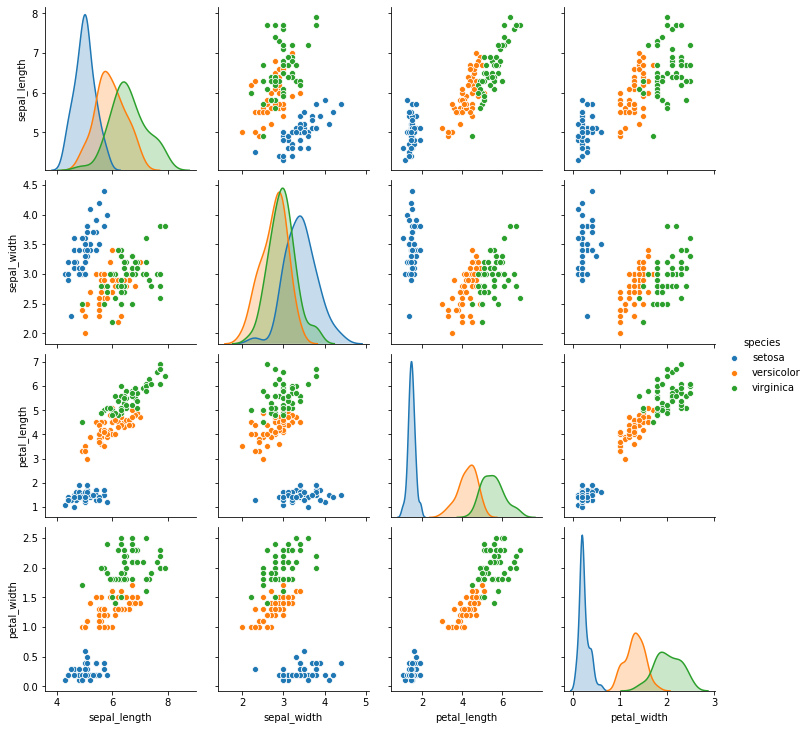

In [15]:
sns.pairplot(df, hue="species")

### Distribution 2D

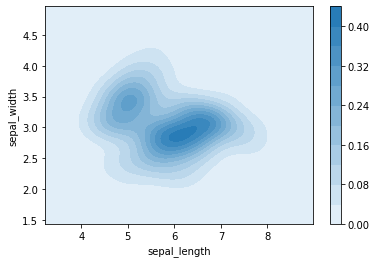

In [24]:
sns.kdeplot(df.sepal_length, df.sepal_width, shade=True, cbar=True)

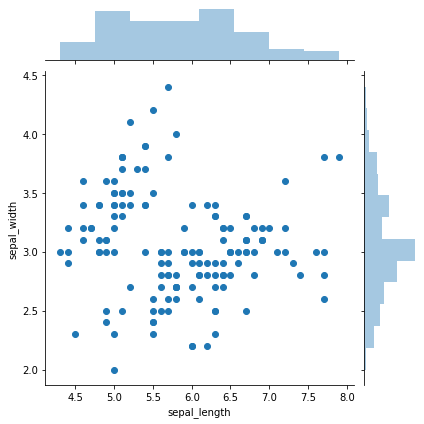

In [29]:
sns.jointplot(df.sepal_length, df.sepal_width)

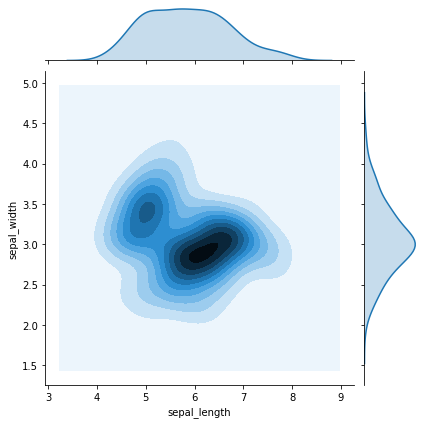

In [30]:
sns.jointplot(df.sepal_length, df.sepal_width, kind="kde")

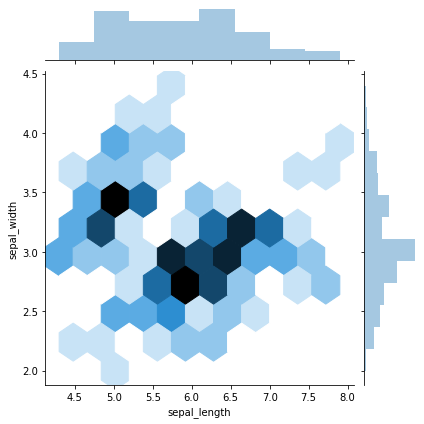

In [31]:
sns.jointplot(df.sepal_length, df.sepal_width, kind="hexplot")

## Pyviz, python et JS

Pyviz a pour objectif d'utiliser Python pour créer des tableau de visualisation interactives utilisant comme moteur des technologies webs (html, svg, JS), et ce en laissant l'utilisateur rester dans un code pure python.

On utilisera une des librairies, `hvplot` qui se greffe aux DataFrame pour créer très rapidement des graphes interactifs.

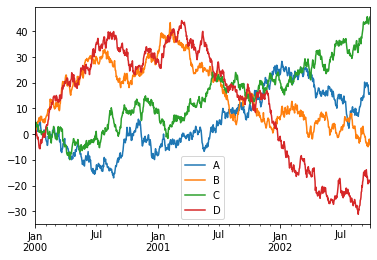

In [32]:
import pandas as pd
import numpy as np
idx = pd.date_range('1/1/2000', periods=1000)
df = pd.DataFrame(np.random.randn(1000, 4), index=idx, columns=list('ABCD')).cumsum() # df de 4 colonnes contenant des données aléatoires
df.plot()

In [35]:
import hvplot.pandas  # avec ça, on va ajouter les méthodes hvplot aux dataframe.
df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [36]:
df = sns.load_dataset("iris")

In [37]:
df.hvplot.kde("sepal_length", by="species")

:NdOverlay   [species]
   :Distribution   [sepal_length]   (Density)

In [46]:
df.hvplot.hist("sepal_length", bins=30, by="species", cumulative=True)

:NdOverlay   [species]
   :Histogram   [sepal_length]   (sepal_length_count)

hvplot utilise `holoviews` pour créer ces graphes : je vous invite à regarder la documentation correspondante pour créer des graphes ou des interactions plus complexes:

http://holoviews.org/